<a href="https://colab.research.google.com/github/javier-jaime/Tool-Crib/blob/master/Colab/Stock_Price_Forecasting_with_yfinance_and_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Assignment: IBM Specialized Models
### Stock Price Forecasting with yfinance and Facebook Prophet

## Importing all the necessary Libraries

In [233]:
#!pip install yfinance
import yfinance as yf
import pandas as pd
import plotly.express as px
from fbprophet import Prophet
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [264]:
# Stock Ticker Input
stock = input('Enter the stock ticker: ')
print(f'You entered {stock}, here is the data from the last 10 days:')
period = '3y'
ticker = yf.Ticker(stock)
data = ticker.history(period)
data.reset_index(inplace=True)
data.tail(10)

Enter the stock ticker: TOU.TO
You entered TOU.TO, here is the data from the last 10 days:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
743,2021-07-08,33.500000,34.290001,32.990002,34.180000,1452300,0.0,0
744,2021-07-09,34.250000,34.419998,33.490002,34.000000,1368900,0.0,0
745,2021-07-12,33.759998,33.849998,33.410000,33.740002,1321000,0.0,0
746,2021-07-13,33.990002,34.900002,33.610001,34.860001,920700,0.0,0
747,2021-07-14,34.880001,35.439999,34.400002,34.480000,1212900,0.0,0
748,2021-07-15,34.200001,34.900002,33.700001,33.959999,1047600,0.0,0
749,2021-07-16,35.200001,35.299999,33.240002,33.570000,1267300,0.0,0
750,2021-07-19,31.139999,33.759998,31.059999,33.299999,1496500,0.0,0
751,2021-07-20,33.400002,34.340000,33.240002,33.650002,896700,0.0,0
752,2021-07-21,34.080002,34.770000,33.709999,34.299999,1374097,0.0,0


In [265]:
print('These are the basic stats:')
data.describe()

These are the basic stats:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,753.000000,753.000000,753.000000,753.000000,7.530000e+02,753.000000,753.0
mean,17.375557,17.695327,17.052380,17.365109,1.284087e+06,0.001965,0.0
std,5.517932,5.585816,5.465633,5.526646,1.056563e+06,0.015655,0.0
min,6.882140,7.200222,6.486947,6.544780,1.218000e+05,0.000000,0.0
25%,13.137756,13.378726,12.886359,13.140881,7.664000e+05,0.000000,0.0
50%,16.725880,17.019788,16.461013,16.733917,1.072900e+06,0.000000,0.0
75%,19.562654,19.834048,19.280356,19.480240,1.490200e+06,0.000000,0.0
max,35.990002,36.180000,35.330002,36.139999,1.593540e+07,0.160000,0.0


# Data Visualization (plotly express) - Visualizing the historical performance

In [266]:
#Line graph (Price), Area graph (Volume) , box plot (Analyzing price and volume)

In [267]:
px.line(data, x="Date", y="Close", title=f'{stock} Stock Close Price')

In [268]:
px.bar(data, x="Date", y="Volume", title=f'{stock} Stock Volume')

In [269]:
px.box(data, y="Close", title=f'{stock} box plot', height=500, width=500)

## Data Preparation for Facebook Prophet

In [270]:
columns=['Date','Close']
prophet_df=pd.DataFrame(data,columns=columns)
prophet_df= prophet_df.rename(columns={'Date':'ds','Close':'y'})  
prophet_df.tail()

,ds,y
748,2021-07-15,33.959999
749,2021-07-16,33.570000
750,2021-07-19,33.299999
751,2021-07-20,33.650002
752,2021-07-21,34.299999


## Creating Facebook Prophet Model

In [271]:
m=Prophet(yearly_seasonality=True)
m.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [272]:
periods = 30
future=m.make_future_dataframe(periods)

In [273]:
forecast=m.predict(future)

In [274]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-07-23,20.552689,19.850145,22.919427,20.552689,20.552689,0.835371,0.835371,0.835371,-0.294846,-0.294846,-0.294846,1.130217,1.130217,1.130217,0.0,0.0,0.0,21.388060
1,2018-07-24,20.530269,19.840274,22.939426,20.530269,20.530269,0.875406,0.875406,0.875406,-0.257614,-0.257614,-0.257614,1.133020,1.133020,1.133020,0.0,0.0,0.0,21.405675
2,2018-07-25,20.507849,19.861182,22.875177,20.507849,20.507849,0.890873,0.890873,0.890873,-0.245515,-0.245515,-0.245515,1.136388,1.136388,1.136388,0.0,0.0,0.0,21.398722
3,2018-07-26,20.485430,19.768815,22.841859,20.485430,20.485430,0.809642,0.809642,0.809642,-0.330793,-0.330793,-0.330793,1.140435,1.140435,1.140435,0.0,0.0,0.0,21.295072
4,2018-07-27,20.463010,19.784722,22.887305,20.463010,20.463010,0.891629,0.891629,0.891629,-0.253598,-0.253598,-0.253598,1.145227,1.145227,1.145227,0.0,0.0,0.0,21.354639
5,2018-07-30,20.395751,19.624063,22.758872,20.395751,20.395751,0.869010,0.869010,0.869010,-0.294846,-0.294846,-0.294846,1.163856,1.163856,1.163856,0.0,0.0,0.0,21.264761
6,2018-07-31,20.373331,19.827268,22.781065,20.373331,20.373331,0.913505,0.913505,0.913505,-0.257614,-0.257614,-0.257614,1.171120,1.171120,1.171120,0.0,0.0,0.0,21.286836
7,2018-08-01,20.350911,19.722982,22.695715,20.350911,20.350911,0.933068,0.933068,0.933068,-0.245515,-0.245515,-0.245515,1.178582,1.178582,1.178582,0.0,0.0,0.0,21.283979
8,2018-08-02,20.328492,19.753252,22.766660,20.328492,20.328492,0.855175,0.855175,0.855175,-0.330793,-0.330793,-0.330793,1.185968,1.185968,1.185968,0.0,0.0,0.0,21.183667
9,2018-08-03,20.306072,19.774061,22.706638,20.306072,20.306072,0.939358,0.939358,0.939358,-0.253598,-0.253598,-0.253598,1.192956,1.192956,1.192956,0.0,0.0,0.0,21.245430


In [275]:
px.line(forecast, x='ds',y='yhat', title=f'{stock} Stock Forecast')

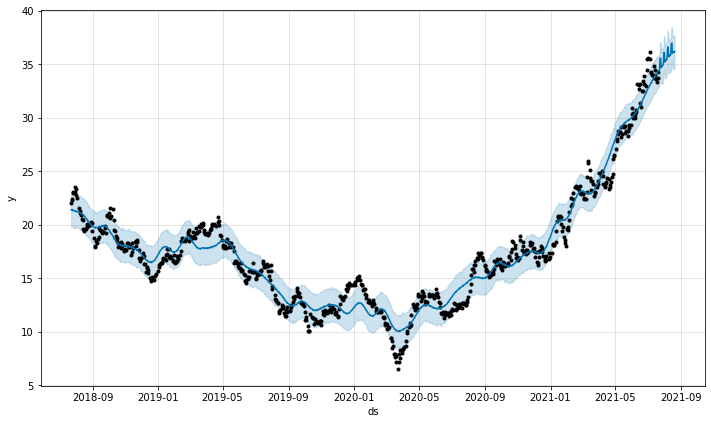

In [276]:
figure=m.plot(forecast, xlabel='ds', ylabel='y')

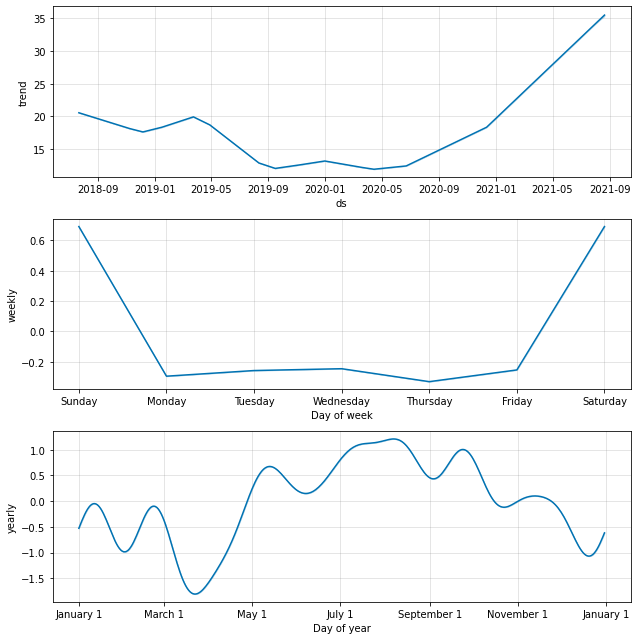

In [277]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [278]:
from google.colab import files
forecast.to_csv(f'{stock}_forecast.csv')
files.download(f'{stock}_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>